In [65]:
import numpy as np
import calendar
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [66]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

In [67]:
df_us = df_us.dropna(subset=['salary_year_avg'])
df_us_explode = df_us.explode('job_skills')
df_us_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [68]:
df_skills = df_us_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_skills = df_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'})
df_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [69]:
data_jobs = len(df_us)
df_skills['skill_percent'] = df_skills['skill_count'] / data_jobs * 100

skill_percent = 5

df_skill_high_demand = df_skills[df_skills['skill_percent'] > skill_percent]

df_skill_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


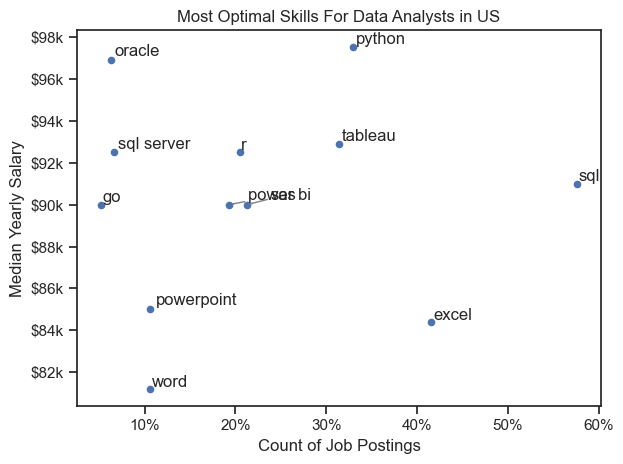

In [70]:
from adjustText import adjust_text

df_skill_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skill_high_demand.index):
    texts.append(plt.text(df_skill_high_demand['skill_percent'].iloc[i], df_skill_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills For Data Analysts in US')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [71]:
df['job_type_skills'][2]

"{'analyst_tools': ['dax'], 'cloud': ['azure'], 'libraries': ['airflow'], 'other': ['docker', 'kubernetes', 'jenkins'], 'programming': ['python', 'sql', 'c#']}"

In [72]:
df_type = df['job_type_skills'].copy().drop_duplicates().dropna()

tech_stack = {}

for x in df_type:
    x_dict = ast.literal_eval(x)                                   ## Convert String to Dictionary 
    for key, value in x_dict.items():
        if key in tech_stack:
            tech_stack[key] += value
        else:
            tech_stack[key] = value

for key, value in tech_stack.items():
    tech_stack[key] = list(set(value))

tech_stack

df_tech = pd.DataFrame(list(tech_stack.items()), columns=['technology','skills'])

In [73]:
df_tech = df_tech.explode('skills')
df_tech

,technology,skills
0,analyst_tools,tableau
0,analyst_tools,sheets
0,analyst_tools,visio
0,analyst_tools,looker
0,analyst_tools,alteryx
...,...,...
9,sync,ringcentral
9,sync,microsoft teams
9,sync,webex
9,sync,twilio


In [74]:
df_plot = df_skill_high_demand.merge(df_tech, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


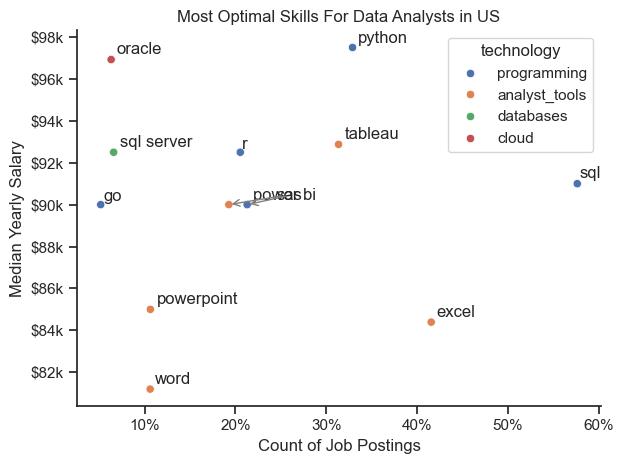

In [ ]:
from adjustText import adjust_text

# df_skill_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(data = df_plot, x = 'skill_percent', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')
# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skill_high_demand.index):
    texts.append(plt.text(df_skill_high_demand['skill_percent'].iloc[i], df_skill_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # Lighter arrows for visibility
            expand=(1.5, 1.5),  # Increase spacing buffer
            force_text=(0.5, 1.0),  # Stronger push on labels
            force_points=(0.3, 0.6),  # Adjust force between points
            only_move={'points': 'y', 'text': 'xy'},  # Allow movement in both directions
            autoalign='y',  # Try auto-aligning text vertically
            avoid_points=True,  # Prevent overlap with points
            min_distance=10,  # Ensure minimum spacing
            lim=1000)  # Increase max iterations for adjustments


# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills For Data Analysts in US')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Adjust layout and display plot
plt.tight_layout()
plt.show()
